In [26]:
import binascii
import numpy as np
import matplotlib.pyplot as plt
import UPVlog
notebook_filename="transmisor_digital"
mylogger=UPVlog.UPVlog(notebook_filename)

# Transmisor de bits

## Introducción 
El objetivo de este cuaderno es obtener las muestras de una señal analógica que servirá para transmitr una serie de bits.

Los bits son la manera universal de representar información:

* Si la información ya es digital, como pueden ser textos, programas, etc. ésta ya está representada por bits

* Si la información es analógica, es necesario un codificador/decodificador para convertir la señal analógica en bits. Ejemplos conocidos de codificacores son MP3 y WAV para audio o JPG y PNG para imágenes y H264 para vídeo.

![Tipos Tranmisión´](imagenes/tiposTransmision.png "Tipos de Transmision")

Una vez se tiene cualquier tipo de información, se puede transmitir por los llamados *Canales Digitales* que reciben como entrada bits, y devuelven a su salida bits que deberían ser idénticos a los transmitidos. En el caso de que existan diferencias:

* Se habla de una **probabilidad de error**

* Es necesario introducir cierta **redundancia** para poder detectar/corregir los bits erróneos.

* En transmisión multimedia los errores en los bits se manifiestan (dependiendo del bit en que se produzca el error):

    * Ligeros clicks en audio o bloques que se ven mal en vídeo
    * Bloques de audio o video imposibles de decodificar que se reproducen como silencio o se visualizan como imagenes en negro en video

* En informática cuando se detecta un error se establecen una serie de **protocolos** que solicitan la retransmisión de los **paquetes** con errores hasta que se tiene la certeza de que todo está correcto.

## Canales Digitales
Los **medios por los que viaja la información son siempre analógicos** (cables, fibras, radio,...)

Se hace necesario convertir pues los bits en una señal analógica que será la que realmente viaje por los medios físicos.

Lo que veremos en este cuaderno es cómo generar las muestras de la señal analógica a transmitir por el medio físico. La señal analógica transmitida será simplemente de convertir las muestras mediante un D/A. La figura siguiente ilustra lo que se pretende hacer

![Transmisor](imagenes/transmisor.png "Transmisor")

**Nuestra misión será generar las muestras de la señal analógica a transmitir los bits**



## Transmisor de bits
La señal analógica que transmitiremos, tendrá el siguiente aspecto:

![NRZ](imagenes/miNRZ.png "NRZ")

* El bit 1 se transimitirá como un pulso de amplitud 1 y una cierta duración

* El bit 0 se transmitirá como un pulso de amplitud -1 y la misma duración

Para darle una cierta aplicación a lo que haremos, supondremos que la información a transmitir es un texto. El proceso será pues:

* Convertir el texto a una secuencia de bits

* A partir de los bits generar las muestras de la señal analógica


# Obtención de los bits a partir del texto

Supongamos que tenemos un texto que queremos transmitir. Supondremos que el texto empieza por la palabra "INICIO" y termina por la palabra "FIN"

In [27]:
mylogger.log("Creando texto a transmitir")
texto="INICIOEsto es un texto de prueba que convertiremos en bits, luego en una forma de onda, para posteriormente detectar los bits, y recomponer el mensajeFIN"

Cada una de las letras, se representa en el ordenador con un *byte* (8 bits) que se pueden ver también como un número entre 0 y 255. Para comprobar de qué número se trata:

In [28]:
letra="a"
print(letra+" --> ",ord(letra))
letra="b"
print(letra+" --> ",ord(letra))
letra="A"
print(letra+" --> ",ord(letra))
letra="B"
print(letra+" --> ",ord(letra))
letra="Z"
print(letra+" --> ",ord(letra))

letra="1"
print(letra+" --> ",ord(letra))
letra="9"
print(letra+" --> ",ord(letra))

letra=";"
print(letra+" --> ",ord(letra))

a -->  97
b -->  98
A -->  65
B -->  66
Z -->  90
1 -->  49
9 -->  57
; -->  59


Una vez tenemos las letras convertidas en números entre 0 y 255, es necesario convertir dicho número en bits

Para ello podemos usar las facilidades que da Python para convertir "cosas" en cadenas. Le diremos que formatee el número como bits extendiendo hasta longitud 8 (opción "08b"):

In [29]:
numero=6
bits=f'{numero:08b}'
print(numero," --> ", bits)

numero=16
bits=f'{numero:08b}'
print(numero," --> ", bits)

numero=255
bits=f'{numero:08b}'
print(numero," --> ", bits)

6  -->  00000110
16  -->  00010000
255  -->  11111111


Las dos ideas anteriores se pueden combinar para convertir una letra en bits:

In [30]:
mylogger.log("Entendiento conversión carácter a bits")
letra="a"
numero=ord(letra) # convertir letra en número
bits=f'{ord(letra):08b}' # convertir letra en bits

print(letra,"-->", numero," --> ", bits)

letra="z"
numero=ord(letra)
bits=f'{ord(letra):08b}'

print(letra,"-->", numero," --> ", bits)

a --> 97  -->  01100001
z --> 122  -->  01111010


_________________
Los bits de la manera anterior son una cadena de texto, tal y como podemos comprobar:

In [31]:
type(bits)

str

Interesa convertir los bits para que en vez de un string de longitud 8 sea un **array de numpy con 8 elementos cada uno de los cuales es un carácter**:

In [32]:
bits_numpy=np.array(list(bits))
print(type(bits_numpy), bits_numpy)

<class 'numpy.ndarray'> ['0' '1' '1' '1' '1' '0' '1' '0']


## Programación

Genere dos funciones:

* *letra_2_bits()*: Esta función recibirá como entrada una letra y devolverá un array de numpy de tamaño 8 con los valores 0/1, del modo descrito más arriba.

* *texto_2_bits()*: Esta función recibirá como entrada un string y devolverá como resultado la concatenación de los bits de todas sus letras

In [33]:
mylogger.log("Programando letra_2_bits")

def letra_2_bits(letra):
    '''
    letra: cadena de longitud 1, por ejemplo letra="a" o letra="c"

    Devuelve un array de numpy  8 elementos con valores '0' / '1' correspondientes a los bits
    '''
    assert type(letra)==type("a"), "La entrada debe ser una letra"
    assert len(letra)==len("a"), "La entrada debe ser una letra"
    bits_numpy=None
    # Calcular bits_numpy
### BEGIN SOLUTION
    bits=f'{ord(letra):08b}'
    bits_numpy=np.array(list(bits))
### END SOLUTION
    return bits_numpy

In [34]:
# Comprobación de la función. Ejecute lo siguiente y compruebe que el resultado es correcto
mylogger.log("Testing letra2bits()")


### BEGIN TESTS
bits_f=letra_2_bits('f')
assert bits_numpy is not None, "Función letra_2_bits() no implementada"
print(bits_f,type(bits_f))
assert np.all(bits_f == np.array(['0', '1' ,'1' ,'0', '0', '1', '1', '0']) ),"Error en letra_2_bits()"
### END TESTS

# Celda para evaluación automática

### BEGIN HIDDEN TESTS
###  HASHED AUTOTEST letra_2_bits('X')
### HASHED AUTOTEST letra_2_bits("8")
### HASHED AUTOTEST letra_2_bits("?")
### END HIDDEN TESTS
mylogger.log("Success Testing letra2bits()")

['0' '1' '1' '0' '0' '1' '1' '0'] <class 'numpy.ndarray'>


In [35]:
def texto_2_bits(texto):
    '''
        texto: string, por ejemplo texto="Hola"

        devuelve array de numpy de 0s y 1s de tamaño 8 x (num_letras)

        Se recomienda usar la función letra_2_bits() anterior
    '''
    assert type(texto) == type("Hola"), "La entrada debe ser un string"

    bits=None
    # Determinar bits
    ### BEGIN SOLUTION
    lista=[]
    for letra in texto:
        lista.append(letra_2_bits(letra))
    bits=np.concatenate(lista,axis=0)
    ### END SOLUTION

    return bits
    

In [36]:
# Celda para comprobación individual.
# Ejecutar y comprobar que imprime lo mismo
# que se indica más abajo:
mylogger.log("Testing texto_2_bits()")
### BEGIN TESTS
bits=texto_2_bits("Hola")
print(len(bits))
print(bits)
print(type(bits))


## RESULTADO ESPERADO:
    # 32
    # ['0' '1' '0' '0' '1' '0' '0' '0' '0' '1' '1' '0' '1' '1' '1' '1' '0' '1'
    # '1' '0' '1' '1' '0' '0' '0' '1' '1' '0' '0' '0' '0' '1']
    #<class 'numpy.ndarray'>
assert bits is not None,"Función texto_2_bits no implementada"

assert len(bits) == len ("Hola")*8, "Función texto_2_bits incorrecta"
assert np.all(bits==np.array(['0' ,'1', '0', '0' ,'1' ,'0' ,'0' ,'0' ,'0' ,
                              '1' ,'1', '0', '1' ,'1' ,'1', '1', '0', '1','1',
                              '0', '1', '1' ,'0' ,'0', '0', '1', '1', '0', '0',
                              '0', '0', '1'])),"Función texto_2_bits incorrecta"
                      
### END TESTS                      

### BEGIN HIDDEN TESTS
# AUTOTEST texto_2_bits("Hola Caracola!")
# AUTOTEST texto_2_bits("Me gusta programar en Python")
# HASHED AUTOTEST texto_2_bits("Elvis Presley")
### END HIDDEN TESTS
mylogger.log("Success Testing texto_2_bits()")

32
['0' '1' '0' '0' '1' '0' '0' '0' '0' '1' '1' '0' '1' '1' '1' '1' '0' '1'
 '1' '0' '1' '1' '0' '0' '0' '1' '1' '0' '0' '0' '0' '1']
<class 'numpy.ndarray'>


## Obtención de las amplitudes a partir de los bits

El siguiente paso consiste en transformar los bits en las amplitudes de los pulsos

Convierte '0'/'1' en ---> -1/1

In [37]:
# Esta función se le da hecha!
def bits_2_amplitudes(bits):
    '''
    bits: array de numpy con '0'/'1's

    Devuelve un array de numpys de tipo np.float32
     '0' ---> -1.0
     '1' ---> 1.0
    '''
    amplitudes= None
    ### BEGIN SOLUTION
    assert type(bits)==type(np.ones(3)),"La entrada no es un array de numpy"
    
    amplitudes=2*(bits.astype(np.float32)-0.5)
    ### END SOLUTION
    return amplitudes


In [38]:
# Comprobación de la función anterior
mylogger.log("Testing bits_2_amplitudes()")
### BEGIN TESTS
bits=np.array([1,0,0,0,1,1,0,1])
amplitudes=bits_2_amplitudes(bits)
assert amplitudes is not None, "Bits_2_amplitudes no implementada"
assert len(amplitudes)==len(bits), "Bits_2_amplitudes errónea"
assert np.all(amplitudes == np.array([ 1., -1., -1. ,-1. , 1. , 1., -1. , 1.])),"Bits_2_amplitudes errónea"

### END TESTS
print("Bits:",bits)
print("Amplitudes:",amplitudes)

### BEGIN HIDDEN TESTS
### AUTOTEST bits_2_amplitudes(np.array(['0','1','0','1','0','1','1','0','1']))
### END HIDDEN TESTS

mylogger.log("Sucess Testing bits_2_amplitudes()")

Bits: [1 0 0 0 1 1 0 1]
Amplitudes: [ 1. -1. -1. -1.  1.  1. -1.  1.]


Cada una de las amplitudes corresponderá a la amplitud de un pulso.

A continuación generaremos los pulsos a partir de las amplitudes


_________________


## Transmisor

Generar las muestras de  un pulso rectangular de duración *D* muestras por cada valor de amplitud

In [39]:
## Programando transmisor
mylogger.log("Programando transmisor()")

def transmisor(bits,D):
    ''' Genera muestras de la señal transmitida a partir de los bits
    0/1 --->-1 /1

    Luego se genera un pulso rectangular de duracion D y amplitd -1 o 1 por cada bit
    '''
    amplitudes=bits_2_amplitudes(bits)
    muestras=None
    
    ### BEGIN SOLUTION
    muestras=np.repeat(amplitudes,D)
    ### END SOLUTION
    
    return muestras

1224 30600


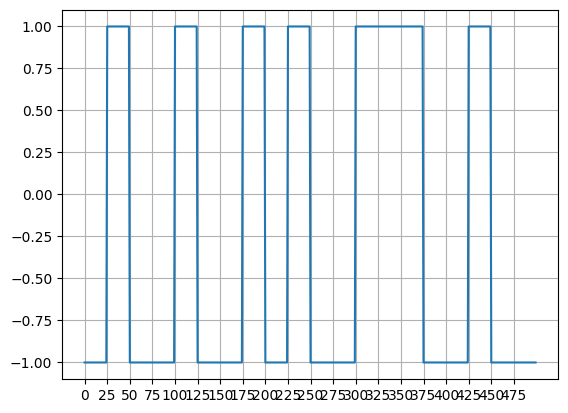

In [40]:
# Comprobación Individual. 
#Ejecute la celda y compruebe que la gráfica coincide con 
#la que se muestra a continuación.
# Si no coincide la corrección automática dará como errónea su respuesta
mylogger.log("Testing transmisor()")
### BEGIN TESTS
bits=np.load('bits.npy')
D=25
muestras=transmisor(bits,D)
assert muestras is not None,"Transmisor no implementado"
print(len(bits),len(muestras))
assert len(muestras)==D*len(bits),"La longitud de las muestras no es correcta"
assert np.min(muestras[:D])==np.max(muestras[:D]) , "Transmisor erroneo"
assert np.min(muestras[-D:])==np.max(muestras[-D:]) , "Transmisor erroneo"

# Representación gráfica Verifique la gráfica para comprobar que hace lo que se espera
nmax=500
_=plt.plot(muestras[:nmax])
_=plt.xticks(np.arange(0,nmax,25))
_=plt.grid()
### END TESTS

### BEGIN HIDDEN TESTS
bits2=np.load('bits.npy')
bits2=bits2[17:99]
### AUTOTEST transmisor(bits2,19)
### AUTOTEST transmisor(bits2,6)
### HASHED AUTOTEST transmisor(bits2[49:104],23)
### END HIDDEN TESTS
mylogger.log("Success Testing transmisor()")


_____________________________

La gráfica de la celda anterior debe ser como la siguiente.

![Transmitida](imagenes/transmitida.png "transmitida")

En caso contrario **revise el código** de transmisor() para que la pregunta se le puntue automáticamente como correcta

## Aleatorizar posición de la transmisión

En las muestras que se obtienen a partir del transmisor implementado, se sabe que las *D* primeras corresponden al primer bit, las *D* siguientes al segundo bit y así sucesivamente.

En la práctica NO se conoce cuando empieza el primer bit. Para modelar lo que sucede en la práctica haremos una función que pondrá una cantidad aleatoria de muestras nulas al principio y al final de una señal.

La siguiente función se le da hecha y no es necesario que haga nada con ella.

In [41]:
# Simplemente ejecute la celda para definir la función.
# No es necesario modificarla
mylogger.log("Definiendo ceros_iniciales_y_finales(muestras)")
def ceros_iniciales_y_finales(muestras):
    '''
    Crea un vector de tamaño doble que muestras con ceros.
    Luego elige una posición al azar y copia las muestras en una cierta posicion
    '''

    nmues=len(muestras)
    out=np.zeros(nmues*2)
    posiini=np.random.randint(low=nmues//8,high=nmues//4)
    posifin=posiini+nmues
    out[posiini:posifin]=muestras
    return out

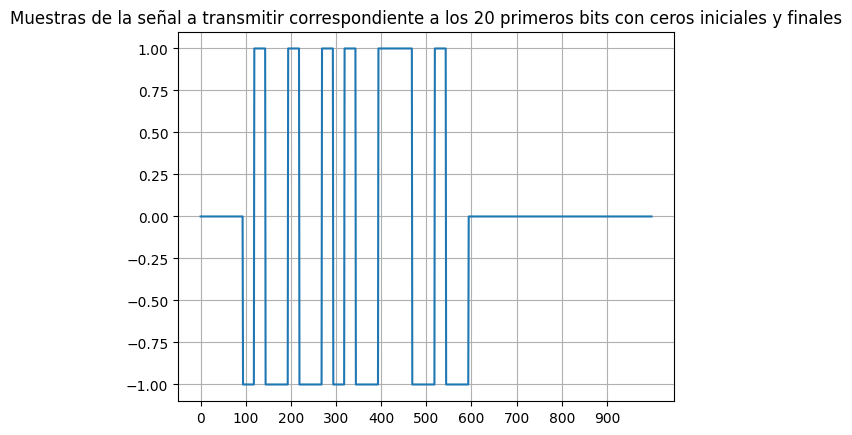

In [42]:
z=ceros_iniciales_y_finales(transmisor(bits[:20],25))
_=plt.plot(z)
nmax=len(z)
_=plt.xticks(np.arange(0,nmax,100))
_=plt.grid()
_=plt.title("Muestras de la señal a transmitir correspondiente a los 20 primeros bits con ceros iniciales y finales")

## Transmisor 2

Es la concatenación del

* transmisor()

* Añadir ceros iniciales y finales

Se le da hecho. No tiene que cambiar nada


In [43]:
# No modificar
# Ejecutar para que se defina la función
mylogger.log("INFO: Definiendo tranmisor2")
def tranmisor2(bits,D):
    muestras=transmisor(bits,D)
    
    muestras_ceros=ceros_iniciales_y_finales(muestras)
    return muestras_ceros

texto: INICIOEsto es un texto de prueba que convertiremos en bits, luego en una forma de onda, para posteriormente detectar los bits, y recomponer el mensajeFIN
Primeros 30 bits: ['0' '1' '0' '0' '1' '0' '0' '1' '0' '1' '0' '0' '1' '1' '1' '0' '0' '1'
 '0' '0' '1' '0' '0' '1' '0' '1' '0' '0' '0' '0']


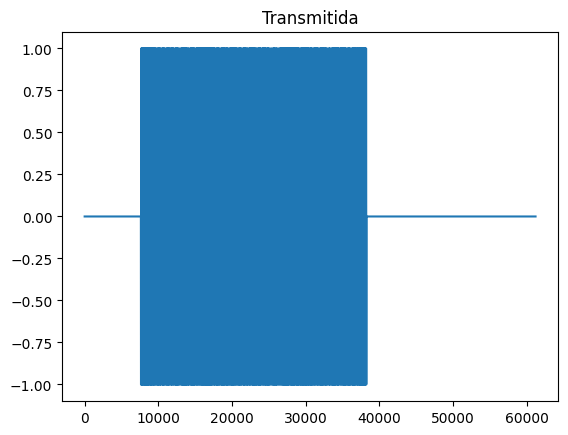

In [44]:
# Generación de la señal total
# Ejecutar y comprobar que la señal tiene "silencios" por delante y por detrás.
D=25
print('texto:',texto)
bits=texto_2_bits(texto)
print('Primeros 30 bits:',bits[:30])
transmitida = tranmisor2(bits,D)
_=plt.plot(transmitida)
_=plt.title('Transmitida')

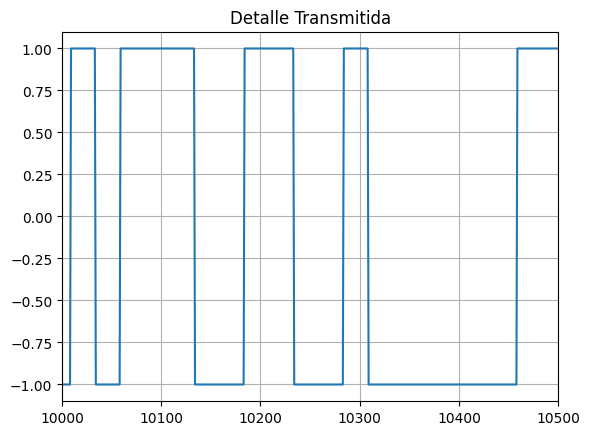

In [45]:
# Ejecutar para ver una gráfica del detalle de los bits
_=plt.plot(transmitida)
_=plt.xlim(10000,10500)
_=plt.grid()
_=plt.title('Detalle Transmitida')

In [46]:
# Ejecutar para guardar resultados
mylogger.log("Guardando  mis_bits.npy y mis_muestras.npy y mi_transmitida.npy")
# Guardado de los bits
np.save('mis_bits.npy',bits)
# Guardado de las muestras
np.save('mis_muestras.npy',muestras)
# Guardado de las muestras con silencios iniciales y finales
np.save('mi_transmitida.npy',transmitida)

## Modelado del canal

La señal analógica que se recibe en el receptor NO es la misma que la que se transmite debido a los efectos del canal. Los efectos más importantes son:

* Retardo: No suele tener mucha importancia. Simplemente los bits se reciben un poco más tarde.

* Atenuación: No suele tener importancia salvo que la atenuación sea muy grande. Se puede compensar con una ganancia y no la consideraremos aquí.

* Ruido añadido. 

* Distorsión Lineal y no lineal: no lo tratamos aquí.


Por tanto nuestro canal lo modelaremos como "algo" que añade un ruido a la señal.

* Modelaremos el canal con la adición de un ruido gaussiano de potencia *N*

* Haremos una función que añada el ruido





In [47]:
# No modificar
# Ejecutar para definir función

mylogger.log("Definiendo ruido")
def ruido(x,N):
    '''
    Añade ruido gaussiano de potencia N
    '''
    nmues=len(x)
    r=np.random.randn(nmues)*np.sqrt(N)
    return x+r


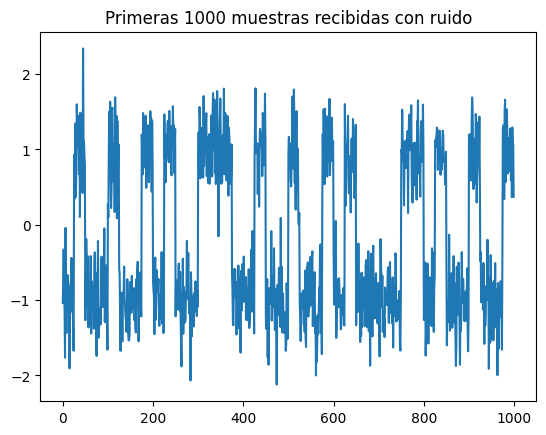

In [48]:
# Añadimos ruido a la señal transmitida sin silencios inicial y final
mylogger.log("Añadiendo ruido")
muestrasr=ruido(muestras,0.15)
_=plt.plot(muestrasr[:1000])
_=plt.title("Primeras 1000 muestras recibidas con ruido")

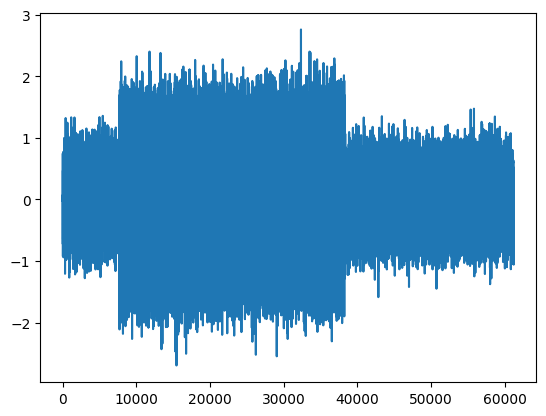

In [49]:
# Añadimos ruido a la señal transmitida que tenía silencios inicial y final
mylogger.log("Añadiendo ruido con ceros iniciales y finales")
transmitidar=ruido(transmitida,0.15)
_=plt.plot(transmitidar)

In [50]:
# Guardar las muestras de las señales que se verán a la entrada del receptor
assert muestrasr is not None and transmitidar is not None
mylogger.log("Guardando  mi_muestrasr.npy y mi_transmitidar.npy")
np.save('mi_muestrasr.npy',muestrasr)
np.save('mi_transmitidar.npy',transmitidar)